In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



np.random.seed(42)

# Estimation with MLE

In [2]:
# beta should be higher than c
n = 100 # number of nodes - 585 similar to c elegans
p = 0  # number of neighbouts to take into account

p = 1 / n
sigma = np.log( p / ( 1 - p ) )    # intercept the higher the harder for creating edges 6

# 10 is how many degrees i want in my graph with p = 0.5
# more factor -> less edges only the sigma will influence
factor = 0.10 # facotr * n is the degree that p=0.5
alpha = -sigma / (2 * (n-1))
beta  = -sigma / (2 * (n-1))

threshold   = 0.5
n_iteration = 100
warm_up     = 5

################################################
params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [3]:
alpha, beta, sigma

(0.023207676010780758, 0.023207676010780758, -4.59511985013459)

In [4]:
graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold, n_iteration=n_iteration, warm_up=warm_up)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, stability_window=3, degree_dist_threshold=0.05)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.08
Degree Distribution Stable: False
Graph Converged: False




iteration: 7
KS Statistic: 0.1
Degree Distribution Stable: False
Graph Converged: False




iteration: 8
KS Statistic: 0.13
Degree Distribution Stable: False
Graph Converged: False




iteration: 9
KS Statistic: 0.07
Degree Distribution Stable: False
Graph Converged: False




iteration: 10
KS Statistic: 0.1
Degree Distribution Stable: False
Graph Converged: False




iteration: 11
KS Statistic: 0.11
Degree Distribution Stable: False
Graph Converged: False




iteration: 12
KS Statistic: 0.06
Degree Distribution Stable: False
Graph Converged: False




iteration: 13
KS Statistic: 0.05
Degree Distribution Stable: False
Graph Converged: False




iteration: 14
KS Statistic: 0.03
KS Statistic: 0.05
Degree Distribution Stable: False
Graph Converged: False




iteration: 15
KS Statistic: 0.01
KS Statistic: 0.03
Degree Dist

In [7]:
initial_guess = [0,0,0]
g = graphs[-1]

est = estimator.MLEGraphModelEstimator(g, p=0)
a_hat, b_hat, s_hat = est.estimate_parameters_torch(initial_guess=initial_guess, learning_rate=0.001, max_iter=30)

Current parameters: alpha=-2.468491792678833, beta=-2.6744892597198486, sigma=-2.4719936847686768, Loss=3500.2373046875
Current parameters: alpha=-2.44574236869812, beta=-2.6482460498809814, sigma=-2.5076687335968018, Loss=624.0299682617188
Current parameters: alpha=-2.4224560260772705, beta=-2.621354579925537, sigma=-2.5414657592773438, Loss=621.5619506835938
Current parameters: alpha=-2.39859676361084, beta=-2.5937604904174805, sigma=-2.573498487472534, Loss=619.1676025390625
Current parameters: alpha=-2.374126672744751, beta=-2.5654046535491943, sigma=-2.6038665771484375, Loss=616.8203125
Current parameters: alpha=-2.3490021228790283, beta=-2.536221504211426, sigma=-2.632655382156372, Loss=614.5097045898438
Current parameters: alpha=-2.3231759071350098, beta=-2.506138324737549, sigma=-2.659940004348755, Loss=612.1844482421875
Current parameters: alpha=-2.296595335006714, beta=-2.4750759601593018, sigma=-2.6857848167419434, Loss=609.862548828125
Current parameters: alpha=-2.269202709

In [ ]:
print(a_hat,b_hat,s_hat)
print(alpha, beta, sigma)

# Estimation with regression 

In [215]:
# beta should be higher than c
n = 1000 # number of nodes - 585 similar to c elegans
p = 0  # number of neighbouts to take into account

p = 1 / n
sigma = np.log( p / ( 1 - p ) )    # intercept the higher the harder for creating edges 6

# 10 is how many degrees i want in my graph with p = 0.5
# more factor -> less edges only the sigma will influence
factor = 0.10 # facotr * n is the degree that p=0.5
alpha = -sigma / (2 * (n-1))
beta  = -sigma / (2 * (n-1))

threshold   = 0.5
n_iteration = 100
warm_up     = 5

################################################
params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [216]:
alpha, beta, sigma

(0.003456834223547825, 0.003456834223547825, -6.906754778648554)

In [225]:
graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold, n_iteration=n_iteration, warm_up=warm_up)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, stability_window=3, degree_dist_threshold=0.05)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.023
KS Statistic: 0.011
Degree Distribution Stable: True
Graph Converged: True






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


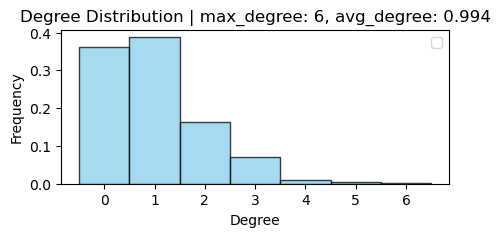

In [229]:
g = graphs[-1]
s = spec
G = nx.Graph(g)

ut = utils.GraphUtils()     
#fig = ut.plot_graph_and_spectrum(g, s, title='Graph and Spectrum', size=(10,5))
fig = ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))
#ut.save_graph_html(g, params_dict)

In [230]:
est = estimator.LogitRegEstimator(g , p=0)

In [231]:
params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0)
params, sigma, alpha, beta

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.097      
Date:               2024-04-18 13:07 AIC:              7107.0191  
No. Observations:   499500           BIC:              7140.3832  
Df Model:           2                Log-Likelihood:   -3550.5    
Df Residuals:       499497           LL-Null:          -3932.4    
Converged:          1.0000           LLR p-value:      1.4020e-166
No. Iterations:     38.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.8923     0.1006   -88.4158   0.0000   -9.0894   -8.6952
x1         0.6894     0.0313    22.0083   0.0000    0.6280    0.7508
x2         0.6920     0.0321    21.5297   0.0000    0.6290    0.7550



(array([-8.89231153,  0.68940751,  0.69197476]),
 -6.906754778648554,
 0.003456834223547825,
 0.003456834223547825)

In [232]:
edges = list(G.edges())
non_edges = list(nx.non_edges(G))

# Combine edges and non-edges to form the dataset
data = edges + non_edges
labels = [1] * len(edges) + [0] * len(non_edges)

# Feature extraction: degrees of the vertices
#normalization = n - 1
normalization = 1
features = np.array([(G.degree(i) / normalization, G.degree(j) / normalization) for i, j in data])


In [233]:
len(edges) / len(non_edges)

0.000995985996076176

In [234]:
import statsmodels.api as sm
features = sm.add_constant(features)

In [235]:
len(np.unique(features))
#len(features)
l = pd.DataFrame(labels, columns=['label'])
f = pd.DataFrame(features, columns=['sigma','alpha','beta'])
dataset = pd.concat([l, f], axis=1)

x = dataset

In [236]:
x

,label,sigma,alpha,beta
0,1,1.0,3.0,1.0
1,1,1.0,3.0,1.0
2,1,1.0,3.0,1.0
3,1,1.0,2.0,1.0
4,1,1.0,2.0,1.0
...,...,...,...,...
499495,0,1.0,1.0,1.0
499496,0,1.0,1.0,0.0
499497,0,1.0,1.0,1.0
499498,0,1.0,1.0,0.0


In [73]:
# Logistic Regression Model using statsmodels with regularization
model = sm.Logit(x['label'].values, x.drop(columns='label').values)


result = model.fit_regularized(L1_wt=1, alpha=0, disp=0)

print(result.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.065     
Date:               2024-04-18 10:58 AIC:              6244.1933 
No. Observations:   124750           BIC:              6273.3955 
Df Model:           2                Log-Likelihood:   -3119.1   
Df Residuals:       124747           LL-Null:          -3335.7   
Converged:          1.0000           LLR p-value:      8.1246e-95
No. Iterations:     34.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -7.5990     0.1256   -60.4881   0.0000   -7.8452   -7.3528
x1        0.4384     0.0290    15.1230   0.0000    0.3816    0.4952
x2        0.4024     0.0259    15.5066   0.0000    0.3515    0.4533



# Multiple times

In [ ]:
n_runs = 20
params_list = []
for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold, n_iteration=n_iteration, warm_up=warm_up)
    graphs, _ = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect

    est = estimator.LogitRegEstimator2(g)
    params, pvalue = est.estimate_parameters()
    params_list.append(params)

    import pickle
    with open(f'runs/results_array2_{i}.pkl', 'wb') as f:
        pickle.dump(params_list, f)



iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.0
KS Statistic: 0.905
Degree Distribution Stable: False
Graph Converged: False




iteration: 7
KS Statistic: 0.0
KS Statistic: 0.0
KS Statistic: 0.905
Degree Distribution Stable: False
Graph Converged: False




iteration: 8
KS Statistic: 0.0
KS Statistic: 0.0
KS Statistic: 0.0
KS Statistic: 0.905
Degree Distribution Stable: False
Graph Converged: False




iteration: 9
KS Statistic: 0.0
KS Statistic: 0.0
KS Statistic: 0.0
KS Statistic: 0.0
Degree Distribution Stable: True
Graph Converged: True






/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter ma

LinAlgError: Singular matrix